In [ ]:
#pip install matplotlib

  Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl (7.8 MB)
  Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl (249 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
  Using cached pillow-11.3.0-cp39-cp39-macosx_11_0_arm64.whl (4.7 MB)
  Using cached fonttools-4.60.1-cp39-cp39-macosx_10_9_universal2.whl (2.8 MB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl (64 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
You should consider upgrading via the '/Users/mattzidell/Documents/GitHub/DSC_258/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [111]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


In [112]:
df = pd.read_csv('grocerydb.csv')

In [113]:
df_cats  = df.groupby(by='category')[['price','Protein','Total Fat','Carbohydrate','Sugars, total','Sodium','Fiber, total dietary','Cholesterol','FPro']].mean()

In [114]:
df_cats_size = df.groupby(by='category').size()
print(df_cats_size.sort_values(ascending=False))

category
prepared-meals-dishes      2043
pastry-chocolate-candy     1529
snacks-bars                1402
cookies-biscuit            1228
snacks-mixes-crackers      1116
produce-packaged           1107
produce-beans-wf           1071
cheese                     1011
snacks-chips                978
ice-cream-dessert           907
meat-packaged               898
dairy-yogurt-drink          831
cereal                      800
bread                       689
sauce-all                   662
rolls-buns-wraps            659
soup-stew                   622
dressings                   574
sausage-bacon               466
snacks-dips-salsa           453
cakes                       404
milk-milk-substitute        402
drink-juice                 391
baking                      382
seafood                     372
pizza                       372
snacks-nuts-seeds           357
drink-shakes-other          309
spread-squeeze              301
breakfast                   289
meat-poultry-wf             274

In [115]:
df2 = pd.DataFrame(df_cats_size)

In [116]:
df2.rename(columns={0:'Count'},inplace=True)
df2.reset_index()

,category,Count
0,baby-food,126
1,baking,382
2,bread,689
3,breakfast,289
4,cakes,404
5,cereal,800
6,cheese,1011
7,coffee-beans-wf,126
8,cookies-biscuit,1228
9,culinary-ingredients,194


In [117]:
df_cats.sort_values(by='Sugars, total',ascending = False, inplace = True)
print(df_cats.head(10))

                           price    Protein  Total Fat  Carbohydrate  \
category                                                               
pastry-chocolate-candy  4.036599   5.968492  24.428236     59.360412   
cookies-biscuit         3.891454   5.413935  19.407403     61.675685   
cakes                   5.601062   3.812273  17.926579     49.180493   
pudding-jello           2.925643   2.790213   5.107701     31.547147   
culinary-ingredients    4.913174   1.073606  35.761145     30.588448   
snacks-bars             7.764474  16.242717  18.523540     51.709138   
baking                  4.203786   8.441010  12.971675    116.000347   
spread-squeeze          6.162922  13.079643  33.369001     33.813918   
ice-cream-dessert       4.429986   3.404550  12.872844     32.914520   
cereal                  4.348554  10.245519   9.065059     72.634049   

                        Sugars, total    Sodium  Fiber, total dietary  \
category                                                      

In [118]:
df_cats = df_cats.merge(df2,left_on='category',right_on='category',how='inner')
df_cats.reset_index(inplace=True)
df_cats.sort_values(by='Count',ascending=False,inplace=True,ignore_index=True)
df_cats['colors'] = np.linspace(0, 1, len(df_cats['category']))
df_cats

,category,price,Protein,Total Fat,Carbohydrate,"Sugars, total",Sodium,"Fiber, total dietary",Cholesterol,FPro,Count,colors
0,prepared-meals-dishes,4.944088,8.778541,7.714210,24.470031,3.213817,0.418739,1.909048,0.022301,0.760531,2043,0.000000
1,pastry-chocolate-candy,4.036599,5.968492,24.428236,59.360412,39.490070,0.166450,4.777536,0.019492,0.837766,1529,0.019608
2,snacks-bars,7.764474,16.242717,18.523540,51.709138,22.557986,0.481686,8.678395,0.004955,0.802740,1402,0.039216
3,cookies-biscuit,3.891454,5.413935,19.407403,61.675685,30.648365,0.316701,2.897132,0.018121,0.925383,1228,0.058824
4,snacks-mixes-crackers,3.634414,9.584123,16.541370,63.923872,10.441529,0.702245,4.110957,0.007145,0.880533,1116,0.078431
5,produce-packaged,3.432184,2.737473,3.996584,19.520358,9.037920,0.806048,2.941295,0.001428,0.644688,1107,0.098039
6,produce-beans-wf,3.573017,3.429117,0.787450,19.125045,5.941667,8.445600,3.912010,0.000083,0.260388,1071,0.117647
7,cheese,4.645843,19.350028,24.839163,4.627508,1.560618,1.292371,0.214896,0.177476,0.596173,1011,0.137255
8,snacks-chips,3.386820,8.913645,27.303850,57.907110,4.187794,0.643640,5.027450,0.004384,0.881418,978,0.156863
9,ice-cream-dessert,4.429986,3.404550,12.872844,32.914520,20.741669,0.235821,1.255056,0.228282,0.835093,907,0.176471


In [119]:
df_cats.columns

Index(['category', 'price', 'Protein', 'Total Fat', 'Carbohydrate',
       'Sugars, total', 'Sodium', 'Fiber, total dietary', 'Cholesterol',
       'FPro', 'Count', 'colors'],
      dtype='object')

In [120]:
df_final_data = df_cats[['category','price','Sugars, total','FPro','Count','colors']]

In [121]:
df_final_data.sort_values('FPro', ascending=False)
df_final_data['FPro_Format'] = df['FPro'].apply(lambda x: '{:,.2f}'.format(x))
df_final_data

/var/folders/x3/2hzhwqqs64bg9zlfssbvx_1m0000gn/T/ipykernel_11662/1898235771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_data['FPro_Format'] = df['FPro'].apply(lambda x: '{:,.2f}'.format(x))


,category,price,"Sugars, total",FPro,Count,colors,FPro_Format
0,prepared-meals-dishes,4.944088,3.213817,0.760531,2043,0.000000,0.82
1,pastry-chocolate-candy,4.036599,39.490070,0.837766,1529,0.019608,0.82
2,snacks-bars,7.764474,22.557986,0.802740,1402,0.039216,0.58
3,cookies-biscuit,3.891454,30.648365,0.925383,1228,0.058824,0.45
4,snacks-mixes-crackers,3.634414,10.441529,0.880533,1116,0.078431,0.77
5,produce-packaged,3.432184,9.037920,0.644688,1107,0.098039,0.44
6,produce-beans-wf,3.573017,5.941667,0.260388,1071,0.117647,0.39
7,cheese,4.645843,1.560618,0.596173,1011,0.137255,0.51
8,snacks-chips,3.386820,4.187794,0.881418,978,0.156863,0.55
9,ice-cream-dessert,4.429986,20.741669,0.835093,907,0.176471,0.40


Text(0, 0.5, 'Sugar Content')

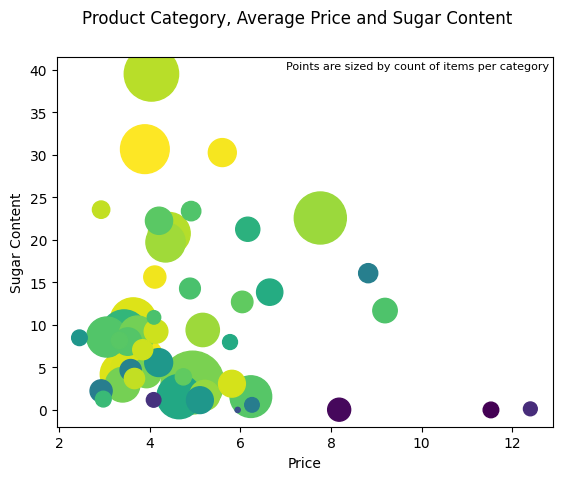

In [122]:
plt.scatter(df_final_data['price'],df_final_data['Sugars, total'],sizes=df_final_data['Count'], c=df_cats['FPro'])
plt.suptitle(f"Product Category, Average Price and Sugar Content")
plt.text(7,40,'Points are sized by count of items per category', fontsize=8)
plt.xlabel("Price")
plt.ylabel("Sugar Content")

In [123]:
norm = colors.Normalize(vmin=df_final_data['FPro'].min(),vmax=df_final_data['FPro'].max())
scalar_mappable = cm.ScalarMappable(norm=norm, cmap='viridis')
scalar_mappable.set_array([])

/var/folders/x3/2hzhwqqs64bg9zlfssbvx_1m0000gn/T/ipykernel_11662/1936150902.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


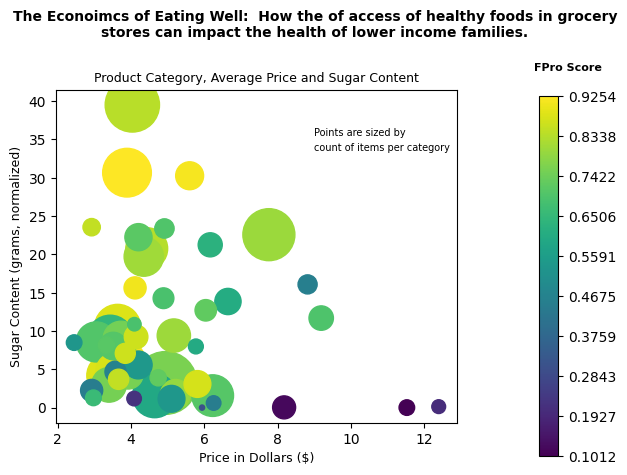

In [179]:
fig = plt.figure()
plt.suptitle(f"The Econoimcs of Eating Well:  How the of access of healthy foods in grocery stores can impact the health of lower income families.",fontsize=10,weight=1000,wrap=True)
plt.title(f"Product Category, Average Price and Sugar Content",fontsize=9,wrap=True)
plt.scatter(df_final_data['price'],df_final_data['Sugars, total'],sizes=df_final_data['Count'], c=df_final_data['FPro'])
plt.text(9,35.5,'Points are sized by ', fontsize=7,wrap=True)
plt.text(9,33.5,'count of items per category', fontsize=7,wrap=True)

plt.text(15,44,'FPro Score', weight=1000, fontsize=8)
plt.xlabel("Price in Dollars ($)",fontsize=9)
plt.ylabel("Sugar Content (grams, normalized)",fontsize=9)

cax = plt.gcf().add_axes([.85,.05, 0.03, 0.75])

plt.colorbar(scalar_mappable, ticks=np.linspace(df_final_data['FPro'].min(), df_final_data['FPro'].max(),10), cax=cax, orientation='vertical')
plt.tight_layout()
plt.show()